# What Time Series actually are?

Time Series models allows us to make predictions when data is time based (e.g. yearly, monthly, daily bases). For example - total calories you ate every day for 10 years.

## Probability cheatsheet

* **covariance** - the measure of how much two random variables change together.

## Properties

### Univariate Time Series

Sequence of measurements of the same variable over time. Most often, the measurements are made at regular time intervals (e.g. daily).

### Trend

Does the measured value increase or decrease over time? 

### Seasonality

Is there a regularly repeating pattern of highs and lows related to seasons, months, weeks, days etc?

### Outliers

Are there data points that are away from other data points?

### Long-run cycle

Is there a period unrelated to seasonality factors?

### Constant variance over time

Is the variance constant or not over time?

### Abrupt changes

Are there dramatic changes to the series or the variance?

## Stationary Series

A series $x_i$ is said to be (weakly) stationary series if:

* The mean $E(x_t)$ is the same for all $t$ i.e. the mean should be a constant

<img src="http://i2.wp.com/www.analyticsvidhya.com/wp-content/uploads/2015/02/Mean_nonstationary.png" />

* The variance of $x_t$ is the same for all $t$ i.e. the variance should be a constant

<img src="http://i0.wp.com/www.analyticsvidhya.com/wp-content/uploads/2015/02/Var_nonstationary.png" />

* The covariance between $x_t$ and $x_{t-h}$ is the same for all t

<img src="http://i2.wp.com/www.analyticsvidhya.com/wp-content/uploads/2015/02/Cov_nonstationary.png?w=566" />

## ARIMA models

### Autocorellation function (ACF)

ACF is simply a measure of how well the value a variable correlates at current time with it's value at at some previous time. For an ACF to make sense it is required that the series is stationary.

#### Definition

Let $x_t$ denote the value of a time series at time $t$.  The *ACF* of the series gives correlations between $x_t$ and $x_t-h$ for $h = 1, 2, 3, etc$.  Theoretically, the autocorrelation between $x_t$ and  $x_t-h$ equals

$$\frac{\text{Covariance}(x_t,  x_{t-h})}{\text{Std}(x_t)\text{Std}(x_{t-h})}  = \frac{\text{Covariance}(x_t, x_{t-h})}{\text{Variance}(x_t)}$$

### AR(1)

One of the simplest *ARIMA* models out there is *AR(1)* which uses linear model to predict the current value given the value of previous time. It's name is acronym for **Autoregressive Model of Order 1**.

* **Order/lag of a model** - indicates how many previous times are used to predict the value of interest at the present time

This model defines the value of $x$ at time $t$ is a linear function of $x$ at time $t-1$:

$$x_t = \delta + \phi_1x_{t-1}+w_t$$

Model assumptions:

* $w_t \overset{iid}{\sim} N(0, \sigma^2_w)$ - errors are independatly distributed with a normal distribution that has mean 0 and constant variance.
* Properties of the errors $w_t$ are independent of $x_t$.

### MA

Rather than use past values of the predicted variable value, a moving average model uses past errors of the model. *MA(1)* - first order moving average model is given by:

$$x_t = \mu + w_t +\theta_1w_{t-1}$$

For example *MA(3)* model would be a weighted average of the current error and the last two errors.

Model assumptions:

* $w_t \overset{iid}{\sim} N(0, \sigma^2_w)$ - errors are independatly distributed with a normal distribution that has mean 0 and constant variance.

* ARMA
* ARIMA

# Who uses Time Series and for what?

Time series analysis is pretty general and it is used at interesting places. Most commonly is used when is needed to predict:

* Annual revenue for a company
* Price for a stock
* Whether to buy a new asset or not
* Power consumption of a city

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings

plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y%m%d')

df = pd.read_csv('data/EURUSD_daily.csv', parse_dates=['<DATE>'], date_parser=dateparse)

In [3]:
df.head()

,<TICKER>,<DATE>,<TIME>,<OPEN>,<LOW>,<HIGH>,<CLOSE>
0,EURUSD,2001-01-03,00:00:00,0.9507,0.9262,0.9569,0.9271
1,EURUSD,2001-01-04,00:00:00,0.9271,0.9269,0.9515,0.9507
2,EURUSD,2001-01-05,00:00:00,0.9507,0.9464,0.9591,0.9575
3,EURUSD,2001-01-08,00:00:00,0.9583,0.9462,0.9588,0.9467
4,EURUSD,2001-01-09,00:00:00,0.9467,0.9384,0.9477,0.9437


In [4]:
clean_df = df.drop('<TICKER>', axis=1)
clean_df = clean_df.drop('<TIME>', axis=1)
clean_df.columns = ["Date", "Open", "Low", "High", "Close"]
clean_df = clean_df.sort_values(by='Date')
clean_df = clean_df.set_index('Date')

In [5]:
print(clean_df.shape)
clean_df.head()

(3648, 4)


,Open,Low,High,Close
Date,,,,
2001-01-03,0.9507,0.9262,0.9569,0.9271
2001-01-04,0.9271,0.9269,0.9515,0.9507
2001-01-05,0.9507,0.9464,0.9591,0.9575
2001-01-08,0.9583,0.9462,0.9588,0.9467
2001-01-09,0.9467,0.9384,0.9477,0.9437


In [6]:
print(clean_df.ix[0])
print(clean_df.ix[-1])

Open     0.9507
Low      0.9262
High     0.9569
Close    0.9271
Name: 2001-01-03 00:00:00, dtype: float64
Open     1.1363
Low      1.1113
High     1.1372
Close    1.1208
Name: 2015-01-23 00:00:00, dtype: float64


In [7]:
stock_data = clean_df

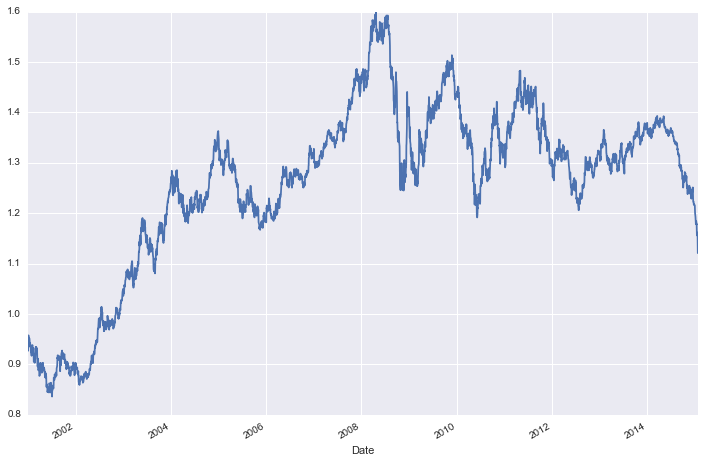

In [8]:
stock_data['Close'].plot();

## Features of the plot

* No consistent trend
* No seasonality 
* No obvious outliers
* What about the variance?

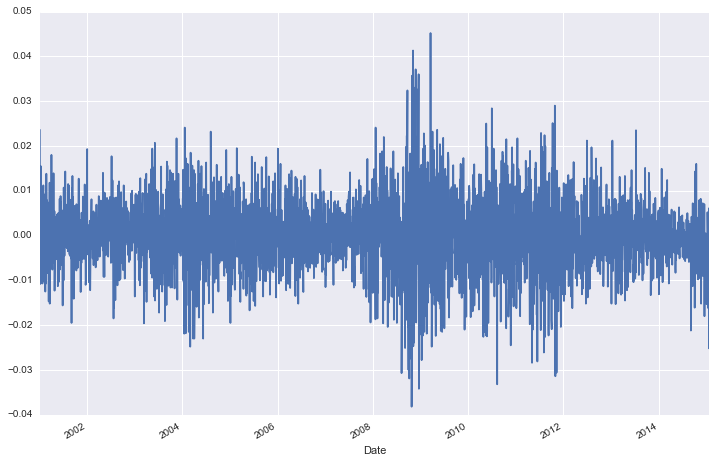

In [9]:
stock_data['FirstDifference'] = stock_data['Close'] - stock_data['Close'].shift()
stock_data['FirstDifference'].plot();

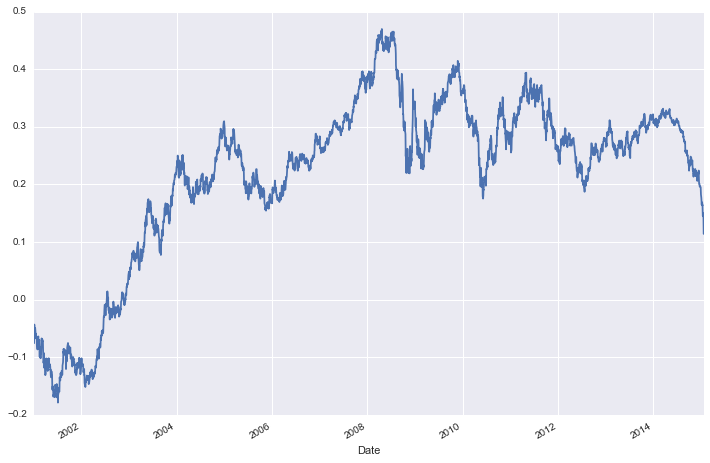

In [10]:
stock_data['NaturalLog'] = stock_data['Close'].apply(lambda x: np.log(x))
stock_data['NaturalLog'].plot();

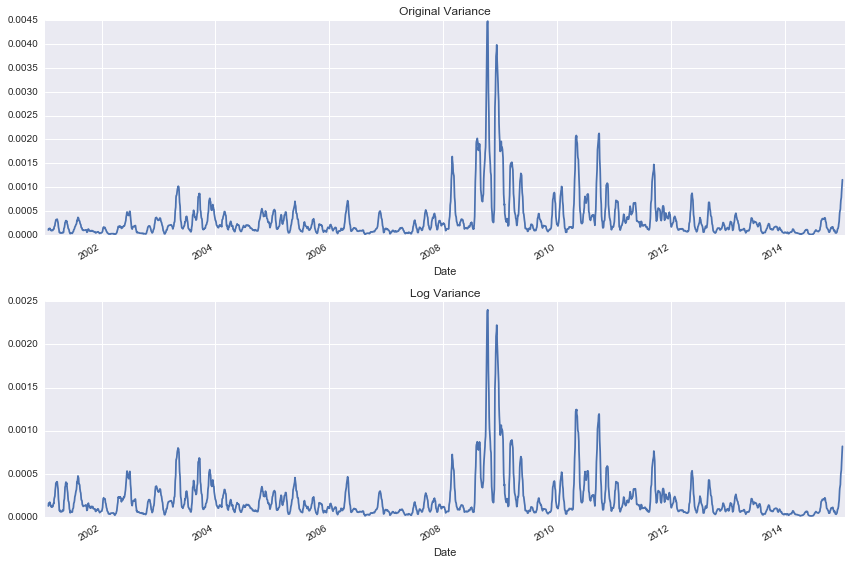

In [11]:
stock_data['OriginalVariance'] = pd.rolling_var(stock_data['Close'], 30, min_periods=None, freq=None, center=True)
stock_data['LogVariance'] = pd.rolling_var(stock_data['NaturalLog'], 30, min_periods=None, freq=None, center=True)

fig, ax = plt.subplots(2, 1)
stock_data['OriginalVariance'].plot(ax=ax[0], title='Original Variance')
stock_data['LogVariance'].plot(ax=ax[1], title='Log Variance')
fig.tight_layout()

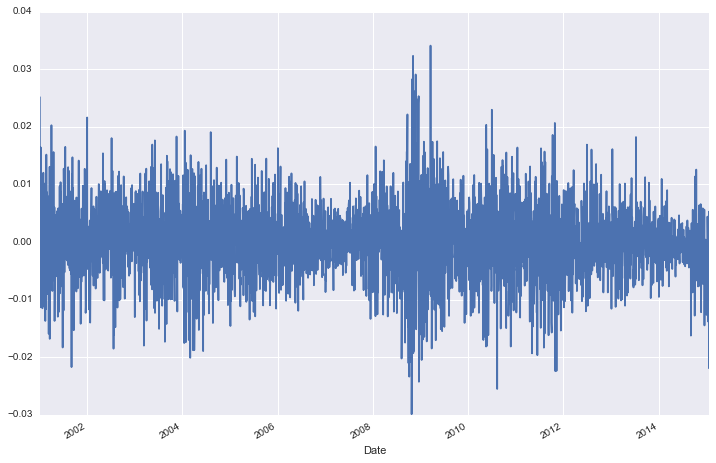

In [12]:
stock_data['LoggedFirstDifference'] = stock_data['NaturalLog'] - stock_data['NaturalLog'].shift()
stock_data['LoggedFirstDifference'].plot();

In [13]:
stock_data['Lag1'] = stock_data['LoggedFirstDifference'].shift()
stock_data['Lag2'] = stock_data['LoggedFirstDifference'].shift(2)
stock_data['Lag5'] = stock_data['LoggedFirstDifference'].shift(5)
stock_data['Lag30'] = stock_data['LoggedFirstDifference'].shift(30)

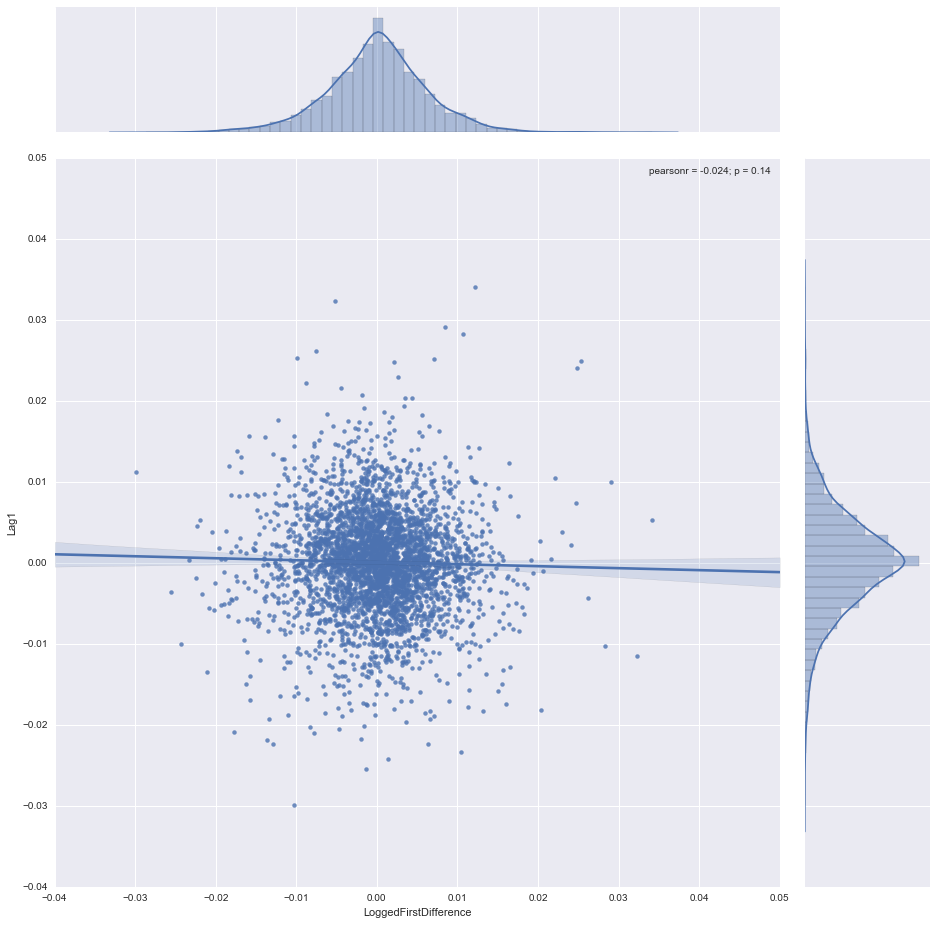

In [14]:
sns.jointplot('LoggedFirstDifference', 'Lag1', stock_data, kind='reg', size=13);

In [15]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

lag_correlations = acf(stock_data['LoggedFirstDifference'].iloc[1:])
lag_partial_correlations = pacf(stock_data['LoggedFirstDifference'].iloc[1:])

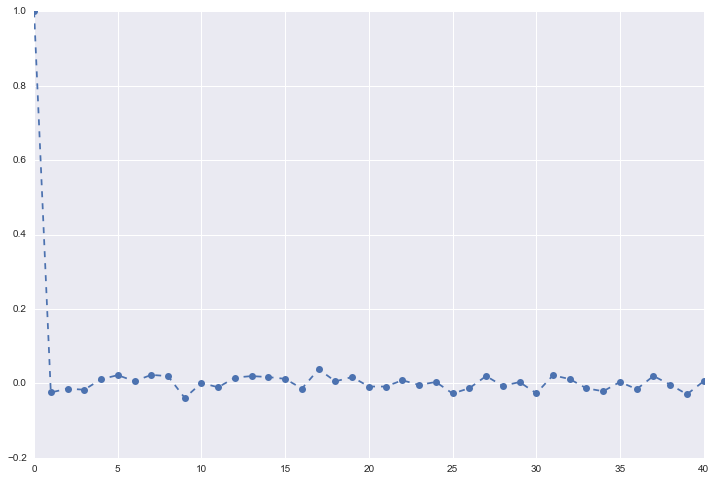

In [16]:
fig, ax = plt.subplots()
ax.plot(lag_correlations, marker='o', linestyle='--');

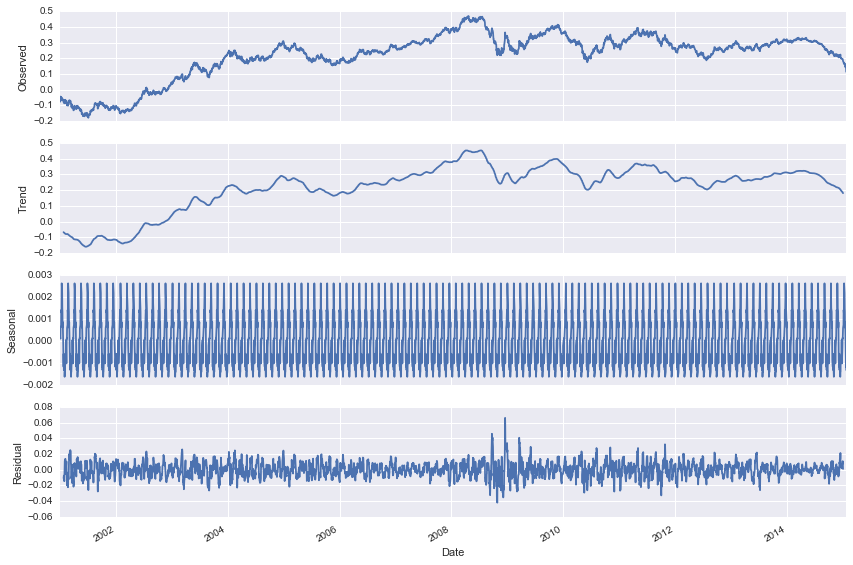

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(stock_data['NaturalLog'], model='additive', freq=30);
fig = plt.figure();
fig = decomposition.plot();

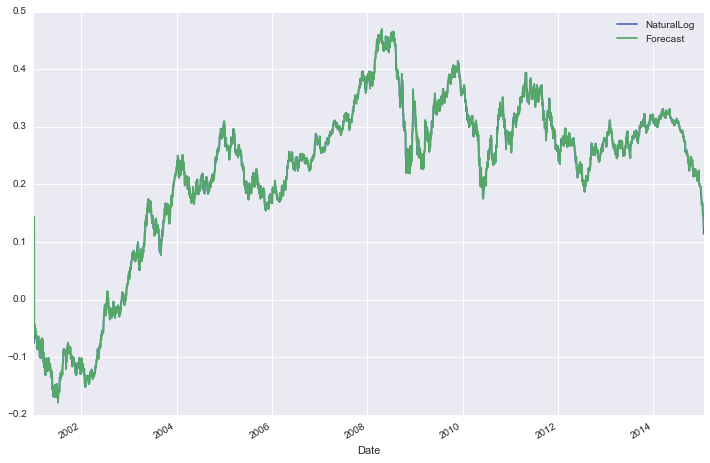

In [18]:
model = sm.tsa.ARIMA(stock_data['NaturalLog'].iloc[1:], order=(1, 0, 0))
results = model.fit(disp=-1)
stock_data['Forecast'] = results.fittedvalues
stock_data[['NaturalLog', 'Forecast']].plot();

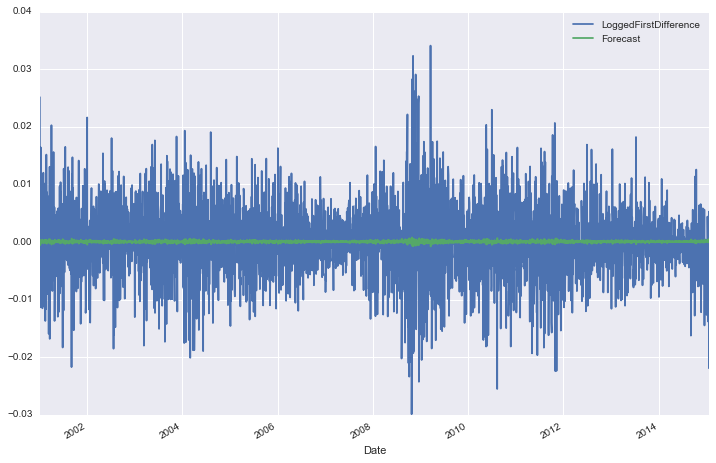

In [19]:
model = sm.tsa.ARIMA(stock_data['LoggedFirstDifference'].iloc[1:], order=(1, 0, 0))
results = model.fit(disp=-1)
stock_data['Forecast'] = results.fittedvalues
stock_data[['LoggedFirstDifference', 'Forecast']].plot()

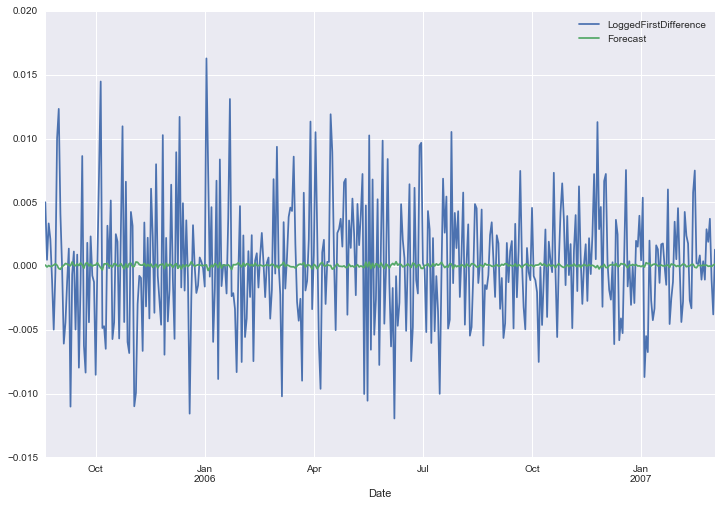

In [20]:
stock_data[['LoggedFirstDifference', 'Forecast']].iloc[1200:1600, :].plot();

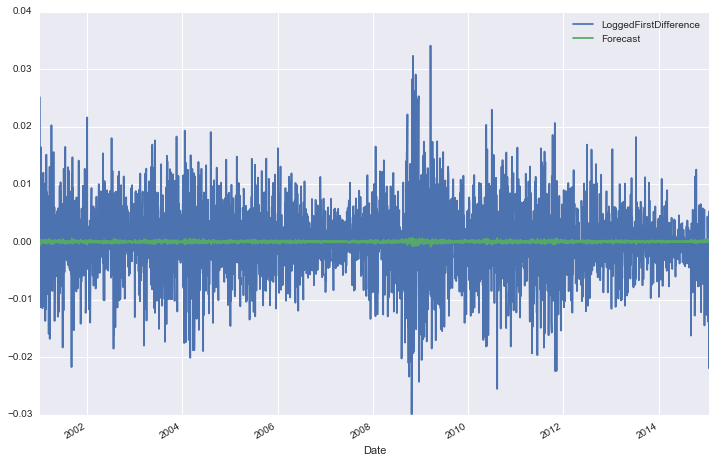

In [21]:
model = sm.tsa.ARIMA(stock_data['LoggedFirstDifference'].iloc[1:], order=(0, 0, 1))
results = model.fit(disp=-1)
stock_data['Forecast'] = results.fittedvalues
stock_data[['LoggedFirstDifference', 'Forecast']].plot();

# References

* [Forecasting: principles and practice](https://www.otexts.org/fpp) - Free book which details Time Series theory & applications